## Week 4 assignment 
We are interested in understanding broadly how climate change is affecting the communities living around the Salton Sea, but more specifially what are some of the health outcomes associated with the lowering of the water level and exposure to the agricultural runoff that has now dried and is being released into the air. 
On top of looking into health data, land use, and environmental indicators of pollution, we want to see who are the people who live in the immediate tracts around the lake, both in terms of racial and ethinic identities and in terms of socioeconomic status. 

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

#### Step 1: bringing in the geodata for the census tracts we are going to be focusing on for this project:

In [3]:
df = gpd.read_file('data/tl_rd22_06_tract.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


#### I want to confirm that there is a geometry column in the data.

In [4]:

df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


#### Now I want to import the census data. I will start by looking at race data. 

In [5]:
race=pd.read_csv('data/R13292060_SL140.csv')

#### I want to get a preview of my imported csv

In [6]:
race.head()

,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,...,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
0,ACSSF,ca,140,0,3856,NaN,NaN,NaN,NaN,6,...,0.14,2.80,64.27,0.85,1.25,0.85,0.38,0.12,55.57,5.27
1,ACSSF,ca,140,0,3858,NaN,NaN,NaN,NaN,6,...,0.00,1.58,82.66,33.30,0.00,0.00,0.00,0.00,41.92,7.43
2,ACSSF,ca,140,0,3859,NaN,NaN,NaN,NaN,6,...,1.34,0.76,40.15,25.72,0.19,0.00,0.00,0.00,9.18,5.07
3,ACSSF,ca,140,0,3862,NaN,NaN,NaN,NaN,6,...,0.75,1.40,76.31,52.88,0.00,3.40,0.00,0.00,10.49,9.54
4,ACSSF,ca,140,0,3863,NaN,NaN,NaN,NaN,6,...,0.00,1.71,68.31,50.62,0.27,0.00,0.00,0.00,9.35,8.07


#### but I want to see all the data

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
race.head()

,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_QName,Geo_FIPS,Geo_AREALAND,Geo_AREAWATR,Geo_PLACESE,Geo_UACP,Geo_VTD,Geo_ZCTA3,Geo_TAZ,Geo_UGA,Geo_PUMA1,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008,SE_A04001_001,SE_A04001_002,SE_A04001_003,SE_A04001_004,SE_A04001_005,SE_A04001_006,SE_A04001_007,SE_A04001_008,SE_A04001_009,SE_A04001_010,SE_A04001_011,SE_A04001_012,SE_A04001_013,SE_A04001_014,SE_A04001_015,SE_A04001_016,SE_A04001_017,PCT_SE_A04001_002,PCT_SE_A04001_003,PCT_SE_A04001_004,PCT_SE_A04001_005,PCT_SE_A04001_006,PCT_SE_A04001_007,PCT_SE_A04001_008,PCT_SE_A04001_009,PCT_SE_A04001_010,PCT_SE_A04001_011,PCT_SE_A04001_012,PCT_SE_A04001_013,PCT_SE_A04001_014,PCT_SE_A04001_015,PCT_SE_A04001_016,PCT_SE_A04001_017
0,ACSSF,ca,140,0,3856,NaN,NaN,NaN,NaN,6,25,NaN,NaN,10101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06025010101,Census Tract 101.01,NaN,NaN,"Census Tract 101.01, Imperial County, California",6025010101,379172003,954069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4254,367,1009,93,58,14,2370,343,8.63,23.72,2.19,1.36,0.33,55.71,8.06,4254,1520,331,956,57,42,9,6,119,2734,36,53,36,16,5,2364,224,35.73,7.78,22.47,1.34,0.99,0.21,0.14,2.80,64.27,0.85,1.25,0.85,0.38,0.12,55.57,5.27
1,ACSSF,ca,140,0,3858,NaN,NaN,NaN,NaN,6,25,NaN,NaN,10200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06025010200,Census Tract 102,NaN,NaN,"Census Tract 102, Imperial County, California",6025010200,187539094,36114014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3108,1445,69,0,11,0,1303,280,46.49,2.22,0.00,0.35,0.00,41.92,9.01,3108,539,410,69,0,11,0,0,49,2569,1035,0,0,0,0,1303,231,17.34,13.19,2.22,0.00,0.35,0.00,0.00,1.58,82.66,33.30,0.00,0.00,0.00,0.00,41.92,7.43
2,ACSSF,ca,140,0,3859,NaN,NaN,NaN,NaN,6,25,NaN,NaN,10300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06025010300,Census Tract 103,NaN,NaN,"Census Tract 103, Imperial County, California",6025010300,467707929,338212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046,851,2,1,21,0,110,61,81.36,0.19,0.10,2.01,0.00,10.52,5.83,1046,626,582,0,1,21,0,14,8,420,269,2,0,0,0,96,53,59.85,55.64,0.00,0.10,2.01,0.00,1.34,0.76,40.15,25.72,0.19,0.00,0.00,0.00,9.18,5.07
3,ACSSF,ca,140,0,3862,NaN,NaN,NaN,NaN,6,25,NaN,NaN,10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06025010500,Census Tract 105,NaN,NaN,"Census Tract 105, Imperial County, California",6025010500,3629627,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7209,5210,72,313,15,0,810,789,72.27,1.00,4.34,0.21,0.00,11.24,10.94,7209,1708,1398,72,68,15,0,54,101,5501,3812,0,245,0,0,756,688,23.69,19.39,1.00,0.94,0.21,0.00,0.75,1.40,76.31,52.88,0.00,3.40,0.00,0.00,10.49,9.54
4,ACSSF,ca,140,0,3863,NaN,NaN,NaN,NaN,6,25,NaN,NaN,10600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06025010600,Census Tract 106,NaN,NaN,"Census Tract 106, Imperial County, California",6025010600,8609621,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6596,5162,94,41,37,0,617,645,78.26,1.43,0.62,0.56,0.00,9.35,9.78,6596,2090,1823,76,41,37,0,0,113,4506,3339,18,0,0,0,617,532,31.69,27.64,1.15,0.62,0.56,0.00,0.00,1.71,68.31,50.62,0.27,0.00,0.00,0.00,9.35,8.07


#### the first column I need to check out is the FIPS one because of the zero issue. Looks like the leading zeros are indeed missing.

In [9]:
race.Geo_FIPS.head()

0    6025010101
1    6025010200
2    6025010300
3    6025010500
4    6025010600
Name: Geo_FIPS, dtype: int64

#### I am going to reimport the data column as a string to solve the leading zero issue. 


In [10]:
race = pd.read_csv(
    'data/R13292060_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
    }
)

#### now I am going to instruct the geoFIPS to add an extra zero to the front of each code.

In [11]:
race['Geo_FIPS']=race['Geo_FIPS'].str.zfill(11)

#### checking that the zfill command worked...

In [12]:
race.Geo_FIPS.head()

0    06025010101
1    06025010200
2    06025010300
3    06025010500
4    06025010600
Name: Geo_FIPS, dtype: object

#### because the columns are coded I want to select for the columns I want and then change the names of the columns. For this purpose, I downloaded the data dictionary file from social explorer. 

In [13]:
columns_to_keep= ['Geo_FIPS',
                  'SE_A03001_001',
                  'SE_A03001_002',    
                  'SE_A03001_003',
                  'SE_A03001_004', 
                  'SE_A03001_005',      
                  'SE_A03001_006',    
                  'SE_A03001_007',
                  'SE_A03001_008',
                  'SE_A04001_001',     
                  'SE_A04001_003',         
                  'SE_A04001_004',       
                  'SE_A04001_005',         
                  'SE_A04001_006',         
                  'SE_A04001_007',         
                  'SE_A04001_008',         
                  'SE_A04001_009',              
                  'SE_A04001_011',         
                  'SE_A04001_012',         
                  'SE_A04001_013',       
                  'SE_A04001_014',        
                  'SE_A04001_015',         
                  'SE_A04001_016',        
                  'SE_A04001_017']
race2 = race[columns_to_keep]
                  

#### this is the same as df.columns.to_list()

In [14]:
columns = list(race2) 
columns

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'SE_A04001_001',
 'SE_A04001_003',
 'SE_A04001_004',
 'SE_A04001_005',
 'SE_A04001_006',
 'SE_A04001_007',
 'SE_A04001_008',
 'SE_A04001_009',
 'SE_A04001_011',
 'SE_A04001_012',
 'SE_A04001_013',
 'SE_A04001_014',
 'SE_A04001_015',
 'SE_A04001_016',
 'SE_A04001_017']

#### Now I am renaming the columns so that they are understood in English. 

In [15]:
race2.columns = ['FIPS',
                'Total Population:',
                'White',
                'Black or African American',
                'American Indian and Alaska Native',
                'Asian',
                'Native Hawaiian and Other Pacific Islander',
                'Some Other Race',
                'Two or More Races',
                'Total Population of Hispanic or Latino by Race',
                'Not Hispanic or Latino White',
                'Not Hispanic or Latino Black',
                'Not Hispanic or Latino Ameican Indian and Alaskan',
                'Not Hispanic or Latino Asian',
                'Not Hispanic or Latino Native Hawaiian and Other Pacific Islander',
                'Not Hispanic or Latino Some Other Race',
                'Not Hispanic or Latino Two or More Races',
                'Hispanic or Latino White',
                'Hispanic or Latino Black',
                'Hispanic or Latino American Indian and Alaska Native',
                'Hispanic or Latino Asian',
                'Hispanic or Latino Native Hawaiian and Other Pacific Islander',
                'Hispanic or Latino Some Other Race',
                'Hispanic or Latino Two or More Races']    

#### Confirming that the column headers were updated. 

In [16]:
race2.sample()

,FIPS,Total Population:,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Races,Total Population of Hispanic or Latino by Race,Not Hispanic or Latino White,Not Hispanic or Latino Black,Not Hispanic or Latino Ameican Indian and Alaskan,Not Hispanic or Latino Asian,Not Hispanic or Latino Native Hawaiian and Other Pacific Islander,Not Hispanic or Latino Some Other Race,Not Hispanic or Latino Two or More Races,Hispanic or Latino White,Hispanic or Latino Black,Hispanic or Latino American Indian and Alaska Native,Hispanic or Latino Asian,Hispanic or Latino Native Hawaiian and Other Pacific Islander,Hispanic or Latino Some Other Race,Hispanic or Latino Two or More Races
2,06025010300,1046,851,2,1,21,0,110,61,1046,582,0,1,21,0,14,8,269,2,0,0,0,96,53


<AxesSubplot: xlabel='White', ylabel='Black or African American'>

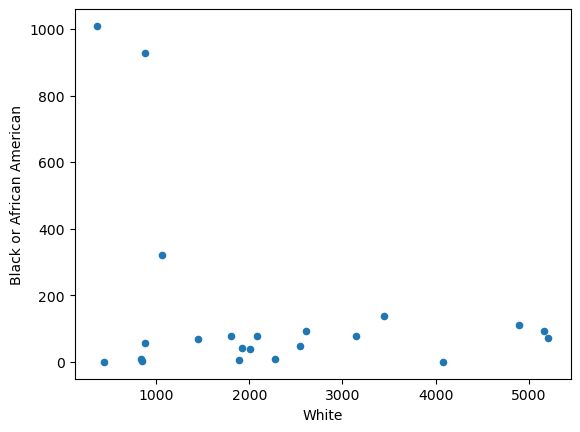

In [17]:
race2.plot.scatter(x='White',y='Black or African American')

<AxesSubplot: xlabel='Total Population:', ylabel='Total Population of Hispanic or Latino by Race'>

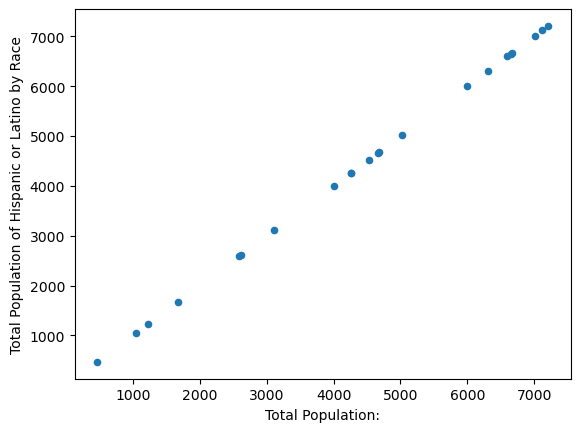

In [18]:
race2.plot.scatter(x='Total Population:',y='Total Population of Hispanic or Latino by Race')

In [19]:
race2_sorted = race2.sort_values(by='Total Population:',ascending = False)

In [28]:
race2_sorted[['FIPS','Total Population:']].head(10)

,FIPS,Total Population:
3,06025010500,7209
19,06065045707,7122
7,06025010900,7011
9,06025011201,6673
21,06065940400,6652
4,06025010600,6596
17,06065045224,6314
10,06025011202,5996
13,06025012301,5018
11,06025011400,4672


In [ ]:
tracts_race2['PCT_Black'] = tracts_race2['Non Hispanic Black Alone']/tracts_race2['TotalPop']*100
tracts_race2['PCT_White'] = tracts_race2['Non Hispanic White Alone']/tracts_race2['TotalPop']*100
tracts_race2['PCT_Latino'] = tracts_race2['Non Hispanic Asian Alone']/tracts_race2['TotalPop']*100